In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Scikit-Learn Model Selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Scikit-Learn Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score, roc_curve

# Scikit-Learn Utilities
from sklearn.utils import resample 



In [2]:
#Load data
data=pd.read_csv('C:/Users/Dell/OneDrive/Desktop/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Preprocessing

In [3]:
#check shape of the data
data.shape

(768, 9)

In [4]:
#see columns 
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


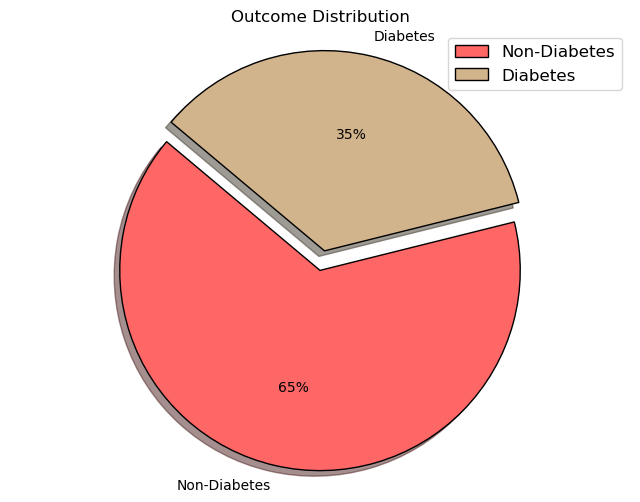

In [6]:
# Sample data for the pie chart
labels = ['Non-Diabetes', 'Diabetes']
sizes = [65, 35]  # Replace these with your actual values
colors = ['#ff6666', '#d2b48c']  # Colors for the segments
explode = (0.1, 0)  # "Explode" the second slice (i.e., pull it out slightly)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Outcome Distribution')

# Add the legend
plt.legend(labels, loc="best", fontsize=12)

plt.show()

Plotting the classes

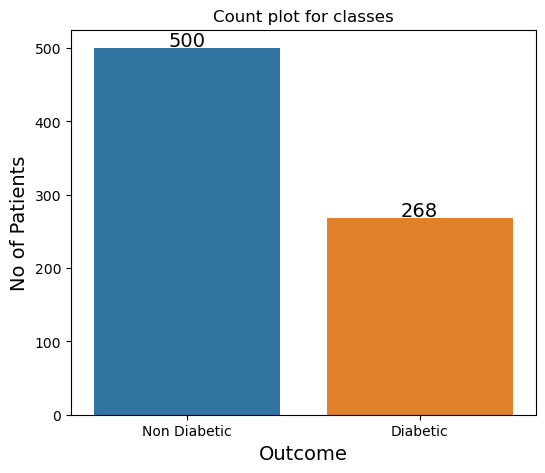

In [7]:
plt.figure(figsize=(6,5))
axis = sns.countplot(x='Outcome', data=data)
plt.title("Count plot for classes")
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("No of Patients", fontsize=14)

# Adding labels on top of each bar
labels = {0: 'Non Diabetic', 1: 'Diabetic'}
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 2, '{:.0f}'.format(height), ha="center", fontsize=14) 

# Replacing x-tick labels
axis.set_xticklabels(['Non Diabetic', 'Diabetic'])

plt.show()


class is imbalanced 

In [8]:
data.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


Here we can see minimum value for columns "Pregnancies", "Glucose","BloodPressure","SkinThickness", "Insulin" and "BMI" is zero.

Women may have zero pregnancies, But Glucose level, BloodPressure, SkinThikness and BMI cannot be zero.

So we need to check count for zeros in these columns.

In [9]:
#count_zeroes in column corresponding to each feature.
lst=[]
cols=data.iloc[:,:-1].columns                      #retrieves the names of these columns and stores them in the variable cols. EXCEPT the last column(i.e Outcome)
for c in cols:
    lst.append([c,len(data.loc[data[c] == 0])])     #filters the DataFrame to include only rows where the value in column 'c' is 0. Then it counts the no. of rows and creates a list.
#print(lst)
pd.DataFrame(lst,columns=["Feature","Count_of_zeros"])




,Feature,Count_of_zeros
0,Pregnancies,111
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0


we can see there are a lot of missing values.

now lets see how the data is distributed

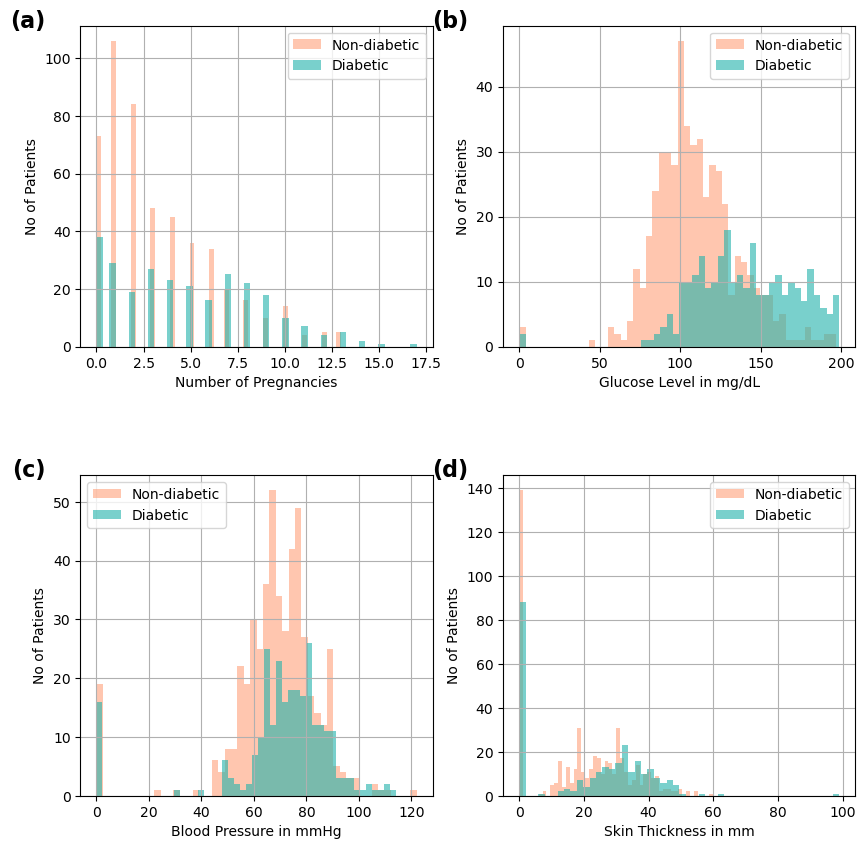

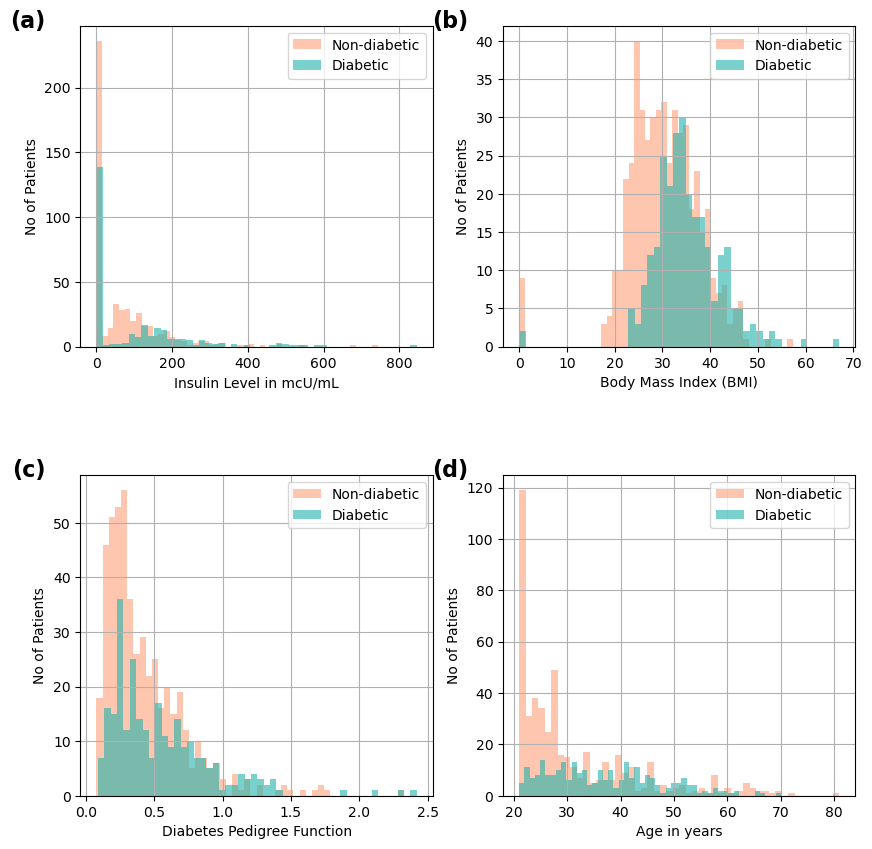

In [10]:
import matplotlib.pyplot as plt

# Define a dictionary to map features to their desired x-labels
x_labels = {
    'Pregnancies': 'Number of Pregnancies',
    'Glucose': 'Glucose Level in mg/dL',
    'BloodPressure': 'Blood Pressure in mmHg',
    'SkinThickness': 'Skin Thickness in mm',
    'Insulin': 'Insulin Level in mcU/mL',
    'BMI': 'Body Mass Index (BMI)',
    'DiabetesPedigreeFunction': 'Diabetes Pedigree Function',
    'Age': 'Age in years'
}

# List of colors to use
colors = ['#FFA07A', '#20B2AA']

# List of subplot labels
subplot_labels_1 = ['(a)', '(b)', '(c)', '(d)']


# Assuming 'data' is the DataFrame containing your dataset, and 'Outcome' is the column indicating diabetic or not.
# 0 for non-diabetic, 1 for diabetic.
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# First plot: 4 features
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
features_1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']

for i, col in enumerate(features_1, 1):
    plt.subplot(2, 2, i)
    non_diabetic[col].hist(bins=50, color=colors[0], alpha=0.6, label='Non-diabetic')
    diabetic[col].hist(bins=50, color=colors[1], alpha=0.6, label='Diabetic')
    
    # Add subplot label
    plt.text(-0.1, 1.05, subplot_labels_1[i-1], transform=plt.gca().transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
    
    plt.xlabel(x_labels[col])
    plt.ylabel('No of Patients')
    plt.legend()

plt.show()

# Second plot: Remaining 4 features
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
features_2 = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(features_2, 1):
    plt.subplot(2, 2, i)
    non_diabetic[col].hist(bins=50, color=colors[0], alpha=0.6, label='Non-diabetic')
    diabetic[col].hist(bins=50, color=colors[1], alpha=0.6, label='Diabetic')
    
    # Add subplot label
    plt.text(-0.1, 1.05, subplot_labels_1[i-1], transform=plt.gca().transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
    
    plt.xlabel(x_labels[col])
    plt.ylabel('No of Patients')
    plt.legend()

plt.show()




Pregnancies - right skewed distribution, as most people in the dataset likely have a lower number of pregnancies.

Glucose - around 100,

BloodPressure - centered around 70-80,

SkinThickness - around 30-35, there is a peak at 0, but that's because of missing values,

Insulin - similar to skinthickness it has missing values and is very skewed with long tail extending till higher insulin values,

BMI - around 30,

DiabetesPedigreeFunction - right-skewed distribution, with most values concentrated at the lower end (around 0.2-0.4),

Age - higher concentration of younger individuals, particularly in the 20-30 range.

### Glucose, BloodPressure, SkinThikness, Insulin, BMI are approximately normal distributed.

In [11]:
# zero replaced by np.NaN to convineintly handle the missing values.
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols]=data[cols].replace(0,np.NaN)

In [12]:
data.isnull().any()
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Outliers

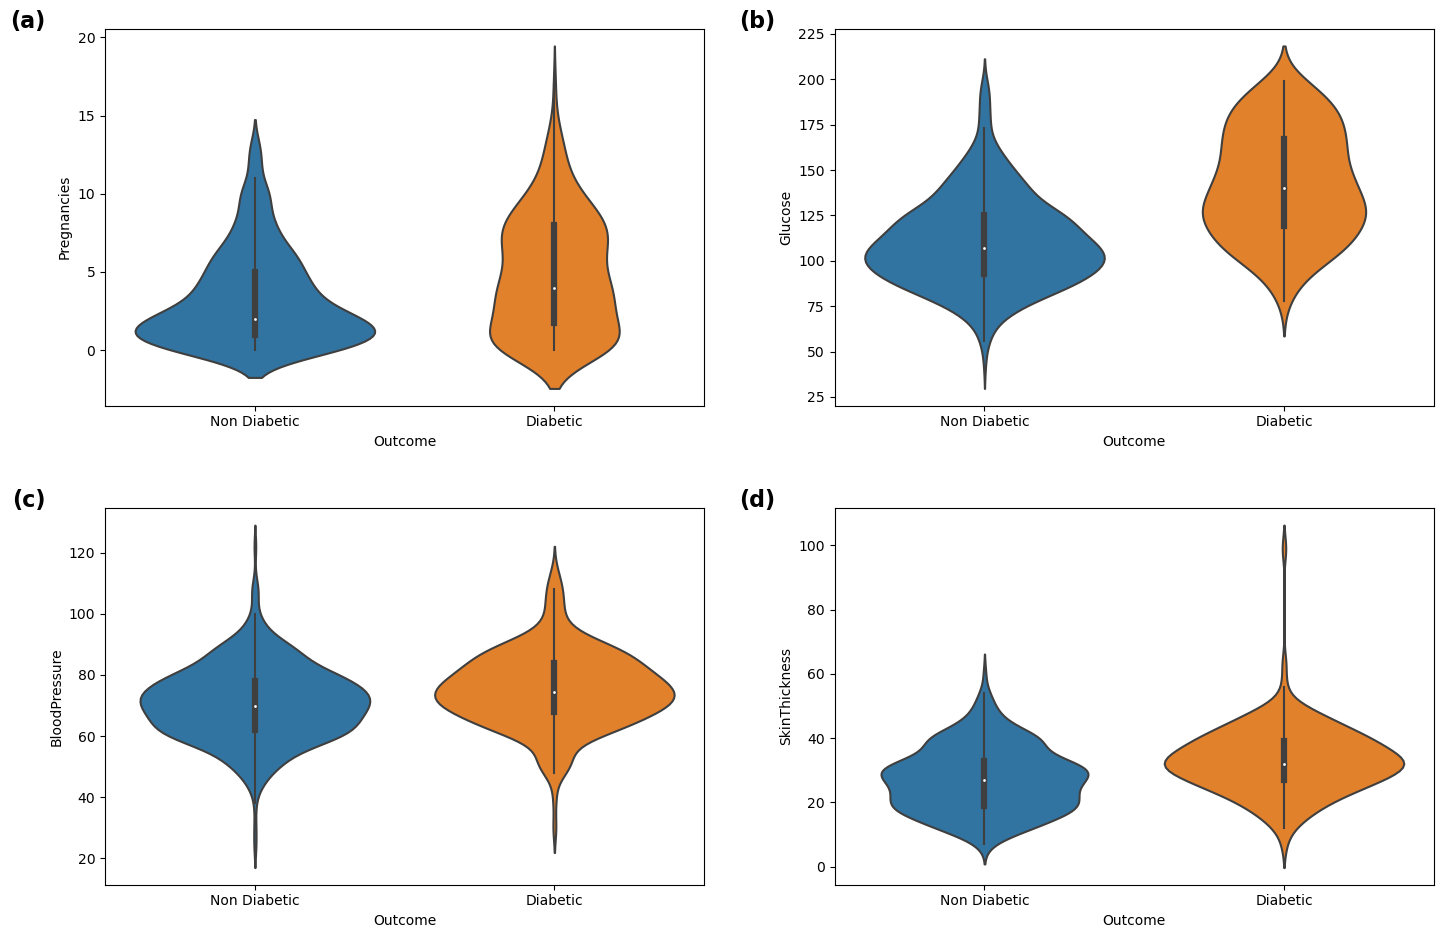

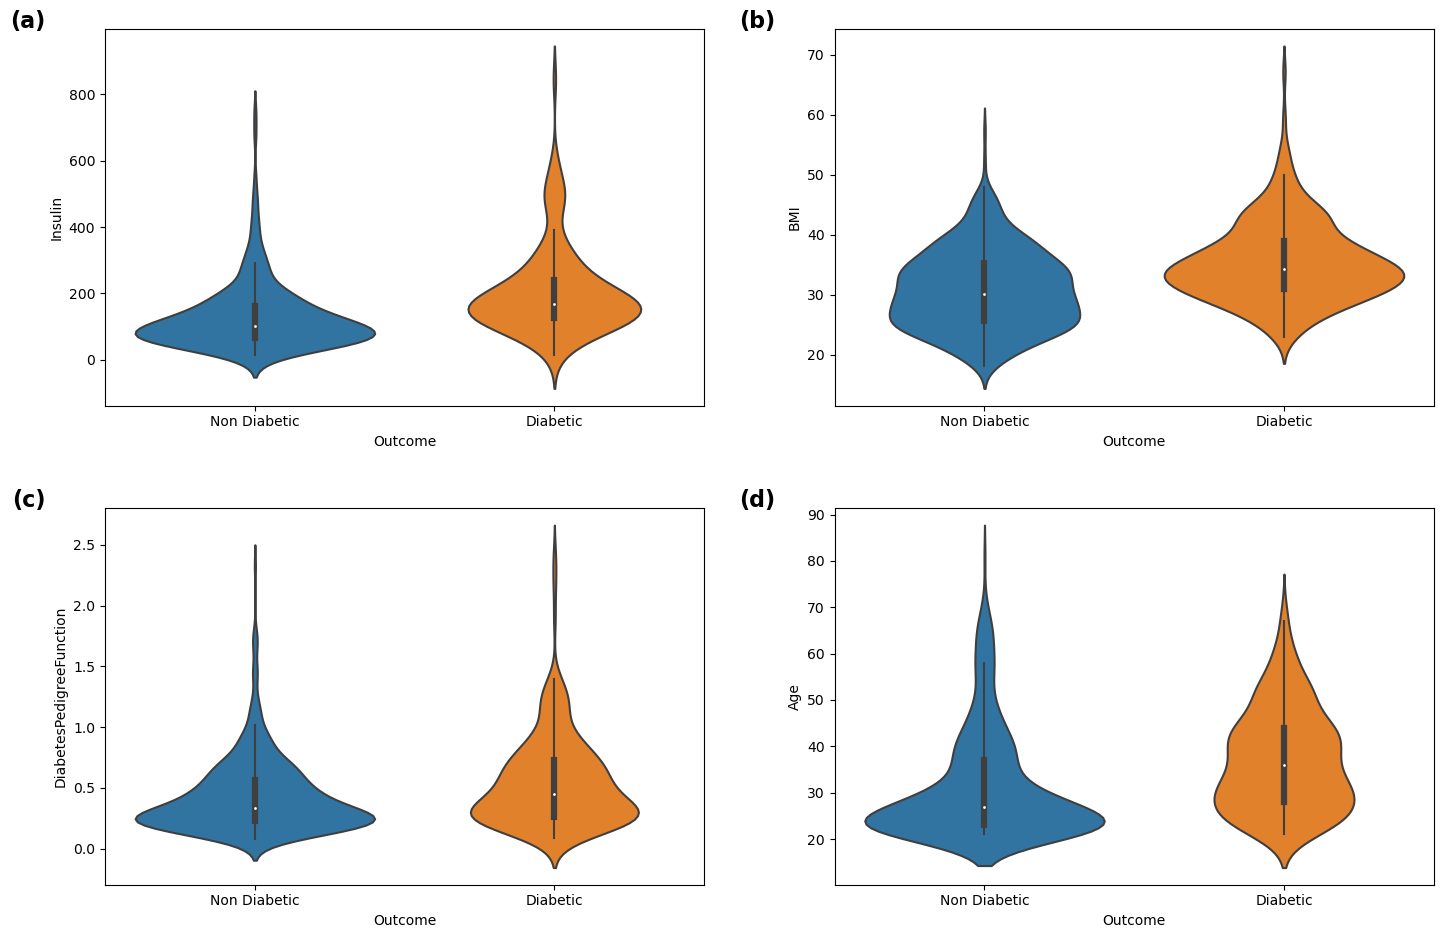

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom x-tick labels
x_tick_labels = ['Non Diabetic', 'Diabetic']

# List of subplot labels (a, b, c, d, etc.)
subplot_labels_1 = ['(a)', '(b)', '(c)', '(d)']


# First plot: 4 features
plt.figure(figsize=(15, 10))
features_1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
for i, column in enumerate(features_1, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Outcome', y=column, data=data)
    
    # Adding subplot labels
    plt.text(-0.1, 1.05, subplot_labels_1[i-1], transform=plt.gca().transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
    
    plt.xlabel('Outcome')
    plt.ylabel(column)
    plt.xticks([0, 1], x_tick_labels)

plt.tight_layout(pad=3.0)  # Increase the space between the plots
plt.show()

# Second plot: Remaining 4 features
plt.figure(figsize=(15, 10))
features_2 = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, column in enumerate(features_2, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Outcome', y=column, data=data)
    
    # Adding subplot labels
    plt.text(-0.1, 1.05, subplot_labels_1[i-1], transform=plt.gca().transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
    
    
    plt.xlabel('Outcome')
    plt.ylabel(column)
    plt.xticks([0, 1], x_tick_labels)

plt.tight_layout(pad=3.0)  # Increase the space between the plots
plt.show()


From the boxplot for each feature , we can see outliers are present for each attribute.

Specially, Glucose, Insulin, BMI and Age these features have high median values with respect to class 1 as compared to their median values for class 0.

Classwise median value for each attribute is different . 

In [14]:
#Classwise median for each independent variable.
lst=[]
for attribute in data.iloc[:,:-1].columns:
    d0=data.loc[data["Outcome"] == 0].loc[data[attribute].notnull()]
    d1=data.loc[data["Outcome"] == 1].loc[data[attribute].notnull()]
    #print(attribute,np.median(d0[attribute]),np.median(d1[attribute]))
    lst.append([attribute,np.median(d0[attribute]),np.median(d1[attribute])])
pd.DataFrame(lst,columns=["Feature","Median for Nondiabetic","Median for diabetic"])

,Feature,Median for Nondiabetic,Median for diabetic
0,Pregnancies,2.000,4.000
1,Glucose,107.000,140.000
2,BloodPressure,70.000,74.500
3,SkinThickness,27.000,32.000
4,Insulin,102.500,169.500
5,BMI,30.100,34.300
6,DiabetesPedigreeFunction,0.336,0.449
7,Age,27.000,36.000


Conclusion: Class oriented medians are different for each feature. So, we are going to replace missing values by class-oriented median value for corresponding feature.

In [15]:
##fill missing values by  class-oriented median value for corresponding feature
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for attribute in cols:
    d0=data.loc[data["Outcome"] == 0].loc[data[attribute].notnull()]
    d1=data.loc[data["Outcome"] == 1].loc[data[attribute].notnull()]
    
    data.loc[(data.Outcome==0)&(data[attribute].isnull()),attribute]=np.median(d0[attribute])
    data.loc[(data.Outcome==1)&(data[attribute].isnull()),attribute]=np.median(d1[attribute])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

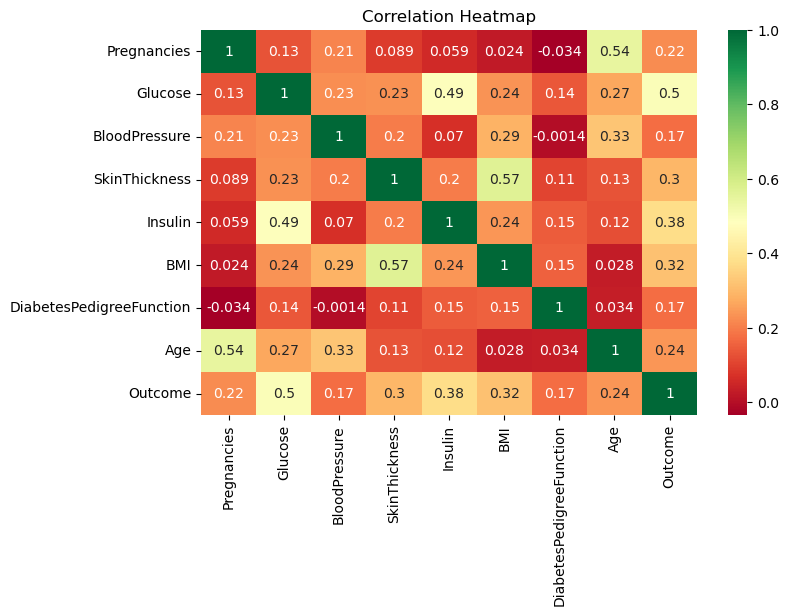

In [17]:
## Correlation
X=data.iloc[:,:]
#plot heat map
plt.figure(figsize=(8,5))
hm=sns.heatmap(X.corr(),annot=True,cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

No obvious correlation between the features.

Now we standardize the Feature columns to bring them on same scale.

### Standard Scaler 

In [18]:
X=data.iloc[:,:-1]

sc_data=StandardScaler().fit_transform(X)                        #creates a NumPy array with the standardized features.
X=pd.DataFrame(sc_data, columns=X.columns,index=X.index)       #converts the standardized data back into a Pandas DataFrame, with same columns
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [19]:
#feature 
X=X
#target
y=data.iloc[:,-1]            #sets the last column ('Outcome') as the target
X.shape, y.shape

((768, 8), (768,))

### Splitting the data 

In [20]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [21]:
#concatenate our training data back together
Train=pd.concat([X_train,y_train],axis=1)
Train.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
491,-0.547919,-1.073339,1.455650,0.102437,-0.440843,0.154939,-0.543248,0.745293,0
69,0.046014,0.798931,1.042364,-0.235210,-0.468919,-0.514053,-0.854320,-0.531023,0
667,1.827813,-0.350709,-0.197495,-0.235210,0.311604,-0.717659,-0.999286,0.575118,1
566,-0.844885,-0.744871,-0.032180,0.102437,-1.389825,0.896648,-0.180834,-1.041549,0


0    356
1    181
Name: Outcome, dtype: int64


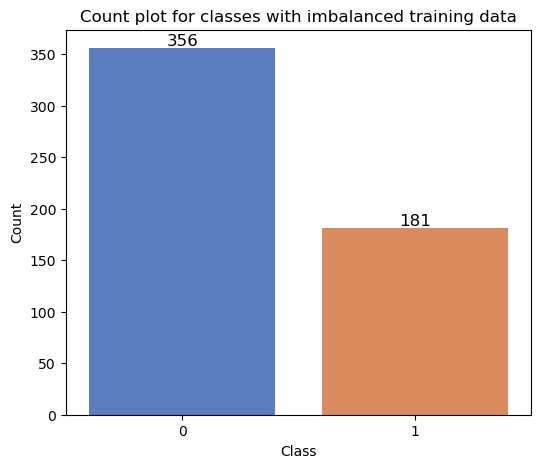

In [22]:
# Count target values of training data
print(Train['Outcome'].value_counts())

# Count the occurrences of each class in the 'Outcome' column of the Train DataFrame
plt.figure(figsize=(6,5))

# Create the count plot
axis = sns.countplot(x='Outcome', data=Train, palette="muted")
plt.title("Count plot for classes with imbalanced training data")
plt.xlabel("Class")
plt.ylabel("Count")

# Adding text annotations on top of the bars
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2., height + 3, f'{int(height)}', ha="center", fontsize=12)

plt.show()


In [23]:
#Seperate minority and majority classes
false=Train[Train.Outcome==0]   #Filters the training data to include only rows where the Outcome is 0 (non-diabetes)
true=Train[Train.Outcome==1]    #

print(false.Outcome.value_counts())  #print the number of samples in each class
print(true.Outcome.value_counts())

0    356
Name: Outcome, dtype: int64
1    181
Name: Outcome, dtype: int64


In [24]:
#upsampled minority
true_upsampled=resample(true,
                        replace=True, #sample with replacement
                        n_samples=len(false),# match no in majority
                        random_state=10)

In [25]:
upsampled=pd.concat([true_upsampled,false])  #Concatenates the upsampled minority class with the majority class to form a new, balanced dataset
upsampled.Outcome.value_counts()

1    356
0    356
Name: Outcome, dtype: int64

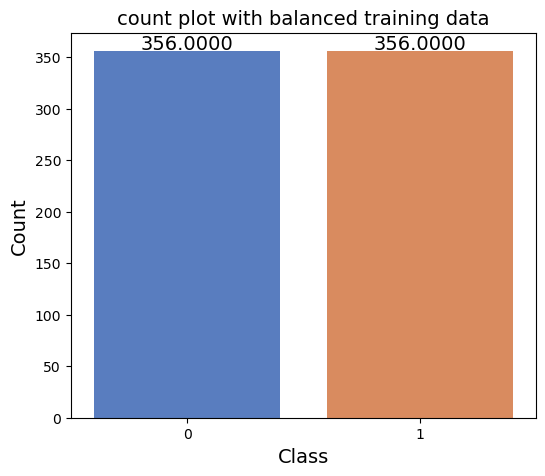

In [26]:
#Visualization of balanced count of target values
fig=plt.figure(figsize=(6,5))
axis = sns.countplot(x='Outcome', data=upsampled, palette="muted")
plt.title("count plot with balanced training data",fontsize=14)
plt.xlabel("Class",fontsize=14)
plt.ylabel("Count",fontsize=14)


for p in axis.patches:
    height = p.get_height()
    axis.text( p.get_x() + p.get_width()/2, height+2,'{:1.4f}'.format(height), ha="center",fontsize=14) 
plt.show()

In [27]:
# Seperate Feature and target from balanced training data
X_train=upsampled.drop('Outcome',axis=1)
y_train=upsampled.Outcome

### Models

LR

training accuracy score :0.7767
testing accuracy score:0.7792
confusion_matrix :
[[111  33]
 [ 18  69]]
classification report :
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       144
           1       0.68      0.79      0.73        87

    accuracy                           0.78       231
   macro avg       0.77      0.78      0.77       231
weighted avg       0.79      0.78      0.78       231



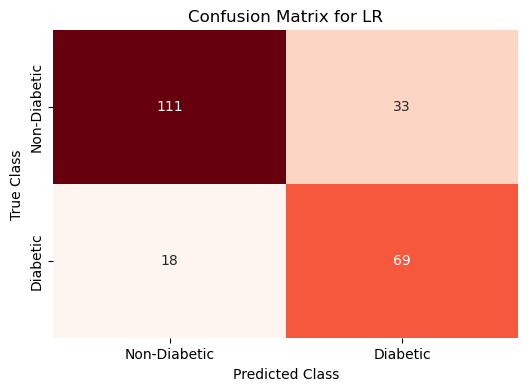

In [28]:
#logisticRegression 
#model
model=LogisticRegression(random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for LR')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

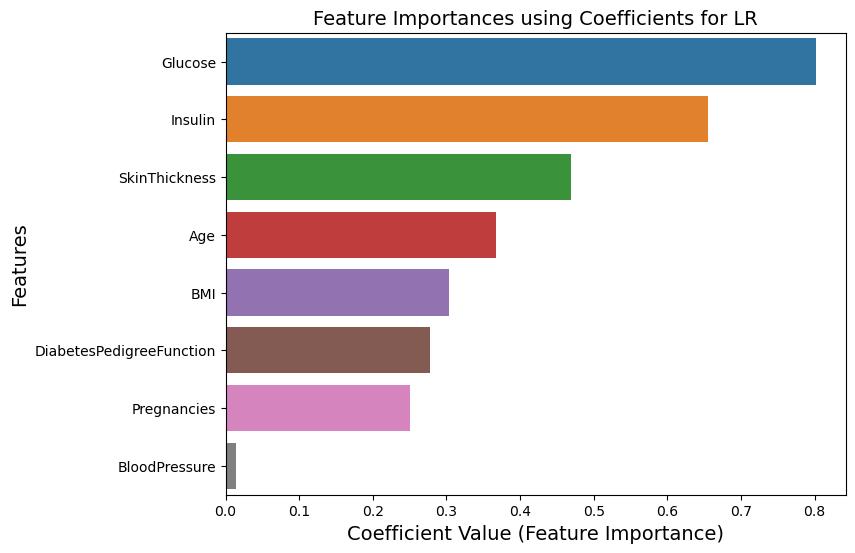

                          Feature importance (in %)
Glucose                                       80.21
Insulin                                       65.51
SkinThickness                                 46.90
Age                                           36.77
BMI                                           30.27
DiabetesPedigreeFunction                      27.83
Pregnancies                                   25.03
BloodPressure                                  1.43


In [29]:
# Feature importances (coefficients) for LogisticRegression
# Since Logistic Regression coefficients can be positive (indicating positive influence) or negative (indicating negative influence),
# it's important to consider their magnitude to understand the importance
feature_imp = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

# Plotting the feature importances (coefficients)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importances using Coefficients for LR", fontsize=14)
plt.xlabel("Coefficient Value (Feature Importance)", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

# Display the feature coefficients as percentages
print(pd.DataFrame(feature_imp * 100, columns=["Feature importance (in %)"]).round(2))

DT

training accuracy score :1.0000
testing accuracy score:0.8312
confusion_matrix :
[[127  17]
 [ 22  65]]
classification_report :
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       144
           1       0.79      0.75      0.77        87

    accuracy                           0.83       231
   macro avg       0.82      0.81      0.82       231
weighted avg       0.83      0.83      0.83       231



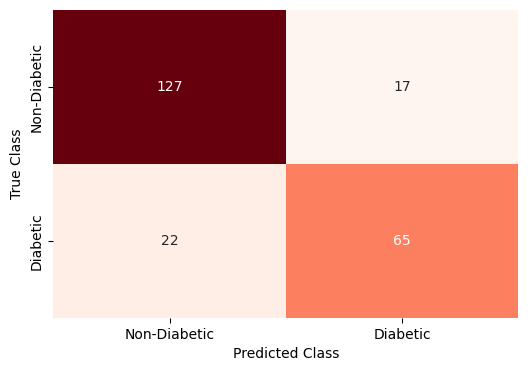

In [30]:
#Decision tree
model = DecisionTreeClassifier(random_state=10,criterion='entropy').fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

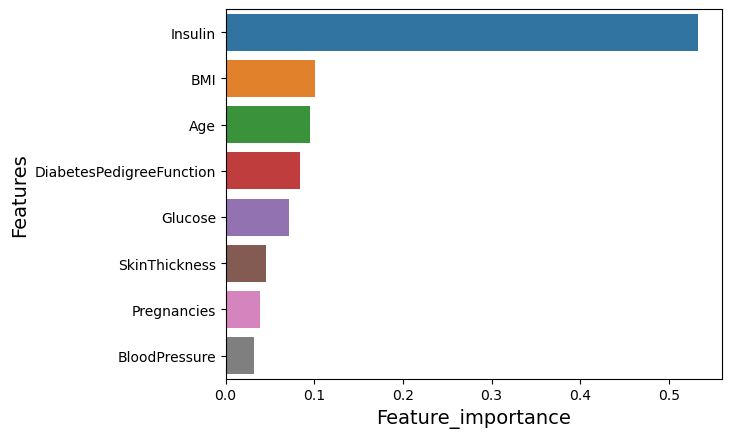

,Feature importance (in %)
Insulin,53.29
BMI,10.03
Age,9.52
DiabetesPedigreeFunction,8.37
Glucose,7.18
SkinThickness,4.55
Pregnancies,3.84
BloodPressure,3.22


In [31]:
#feature importances
feature_imp=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 

sns.barplot(x=feature_imp,y=feature_imp.index)

plt.xlabel("Feature_importance",fontsize=14)
plt.ylabel("Features",fontsize=14)
plt.show()

pd.DataFrame(feature_imp*100 , columns=["Feature importance (in %)"]).round(2)

KNN

In [32]:
#For KNN : Programme to find value of "n_neighbors"  for which accuracy is high
lst=[]
for i in range(1,21):
   
    model=KNeighborsClassifier(n_neighbors=i,p=2, metric='minkowski').fit(X_train,y_train.ravel())
    #predict the responce for test dataset
    prediction=model.predict(X_test)
    #Model Evaluation
    
    accuracy =accuracy_score(y_test.ravel(),prediction.ravel())
    lst.append(accuracy)
k=np.array(lst).argmax()+1
print("Best_k:",k)

Best_k: 15


training accuracy score :0.8385
testing accuracy score:0.8052
confusion_matrix :
[[114  30]
 [ 15  72]]
classification_report :
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       144
           1       0.71      0.83      0.76        87

    accuracy                           0.81       231
   macro avg       0.79      0.81      0.80       231
weighted avg       0.82      0.81      0.81       231



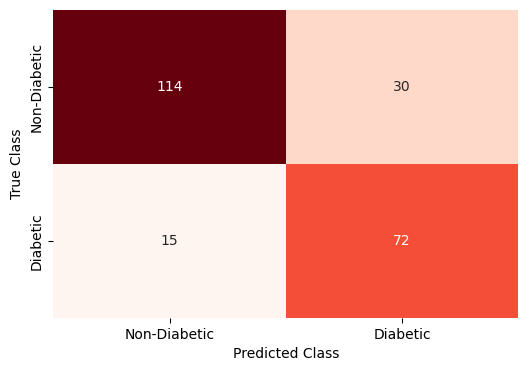

In [33]:
#KNN
model=KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski').fit(X_train,y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model

#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

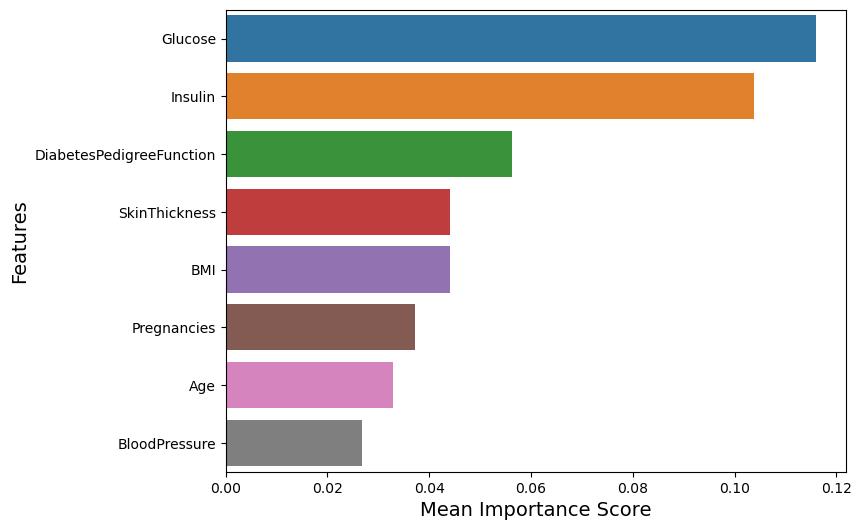

                          Feature importance (in %)
Glucose                                       11.60
Insulin                                       10.39
DiabetesPedigreeFunction                       5.63
SkinThickness                                  4.42
BMI                                            4.42
Pregnancies                                    3.72
Age                                            3.29
BloodPressure                                  2.68


In [34]:
# Permutation Feature Importance
perm_importance = permutation_importance(model, X_test, y_test)

# Convert the importance into a pandas Series for easier plotting
feature_imp = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Mean Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

# Display feature importance as a DataFrame
print(pd.DataFrame(feature_imp * 100, columns=["Feature importance (in %)"]).round(2))

Gaussian NB

training accuracy score :0.7303
testing accuracy score:0.7532
confusion_matrix :
[[114  30]
 [ 27  60]]
classification_report :
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       144
           1       0.67      0.69      0.68        87

    accuracy                           0.75       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.75      0.75       231



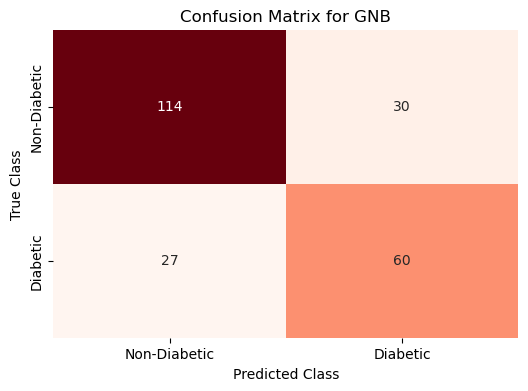

In [35]:
#GaussianNB
model=GaussianNB().fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model

#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for GNB')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

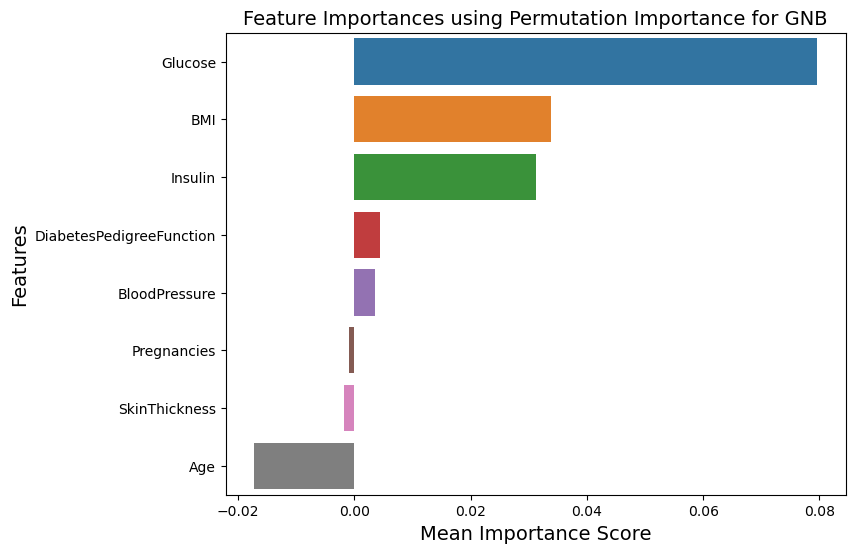

                          Feature importance (in %)
Glucose                                        7.97
BMI                                            3.38
Insulin                                        3.12
DiabetesPedigreeFunction                       0.43
BloodPressure                                  0.35
Pregnancies                                   -0.09
SkinThickness                                 -0.17
Age                                           -1.73


In [36]:
# Permutation Feature Importance
perm_importance = permutation_importance(model, X_test, y_test)

# Convert the importance into a pandas Series for easier plotting
feature_imp = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importances using Permutation Importance for GNB", fontsize=14)
plt.xlabel("Mean Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

# Display feature importance as a DataFrame
print(pd.DataFrame(feature_imp * 100, columns=["Feature importance (in %)"]).round(2))

SVC

training accuracy score :0.8287
testing accuracy score:0.8139
confusion_matrix :
[[114  30]
 [ 13  74]]
classification_report :
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       144
           1       0.71      0.85      0.77        87

    accuracy                           0.81       231
   macro avg       0.80      0.82      0.81       231
weighted avg       0.83      0.81      0.82       231



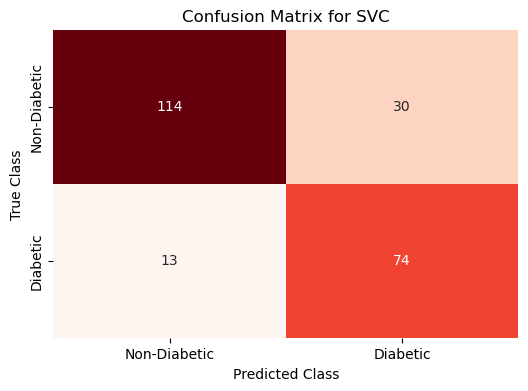

In [37]:
#SVC

model=SVC(kernel="linear", probability=True, random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


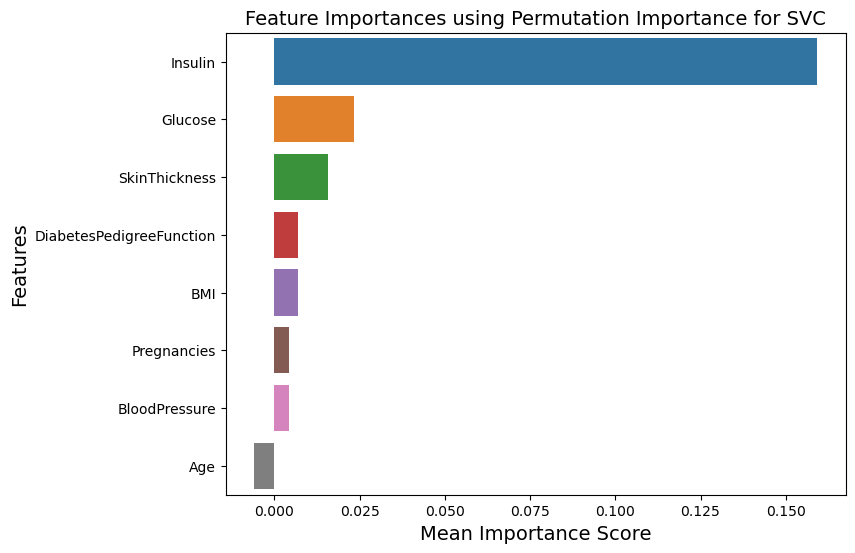

                          Feature importance (in %)
Insulin                                       15.93
Glucose                                        2.34
SkinThickness                                  1.56
DiabetesPedigreeFunction                       0.69
BMI                                            0.69
Pregnancies                                    0.43
BloodPressure                                  0.43
Age                                           -0.61


In [38]:
# Permutation Feature Importance
perm_importance = permutation_importance(model, X_test, y_test)

# Convert the importance into a pandas Series for easier plotting
feature_imp = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importances using Permutation Importance for SVC", fontsize=14)
plt.xlabel("Mean Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

# Display feature importance as a DataFrame
print(pd.DataFrame(feature_imp * 100, columns=["Feature importance (in %)"]).round(2))

Gradient Boosting

training accuracy score :0.9902
testing accuracy score:0.8658
confusion_matrix :
[[127  17]
 [ 14  73]]
classification_report :
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       144
           1       0.81      0.84      0.82        87

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



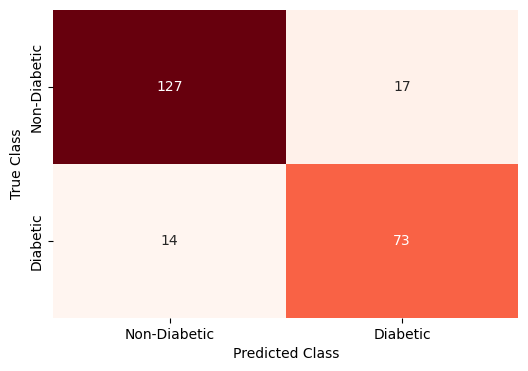

In [39]:
#GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

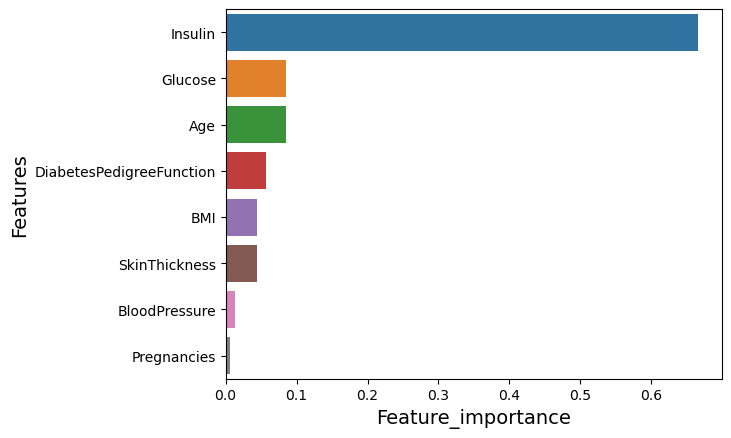

,Feature importance (in %)
Insulin,66.58
Glucose,8.56
Age,8.45
DiabetesPedigreeFunction,5.70
BMI,4.44
SkinThickness,4.37
BloodPressure,1.29
Pregnancies,0.60


In [40]:
#feature importances
feature_imp=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 

sns.barplot(x=feature_imp,y=feature_imp.index)

plt.xlabel("Feature_importance",fontsize=14)
plt.ylabel("Features",fontsize=14)
plt.show()

pd.DataFrame(feature_imp*100 , columns=["Feature importance (in %)"]).round(2)

RF

training accuracy score :1.0000
testing accuracy score:0.8658
confusion_matrix :
[[129  15]
 [ 16  71]]
classification_report :
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       144
           1       0.83      0.82      0.82        87

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



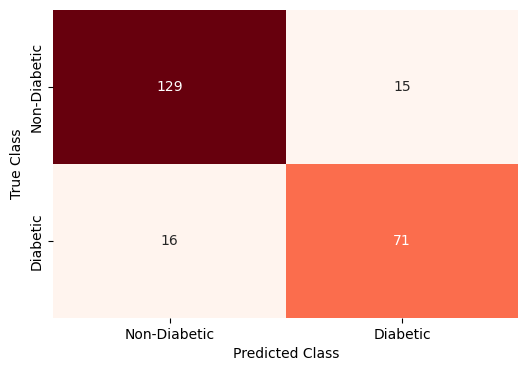

In [41]:
#RandomForest Classifier
model=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10).fit(X_train, y_train.ravel())    
#model=RandomForestClassifier(n_estimators=100,random_state=10).fit(X_train, y_train.ravel())
#predict
prediction=model.predict(X_test)

#Evaluation of model

#accuracy
print('training accuracy score :%.4f'%accuracy_score(y_train.ravel(),model.predict(X_train)))
print('testing accuracy score:%.4f' %accuracy_score(prediction,y_test))

#confusion_matrix
print("confusion_matrix :")
cm = confusion_matrix(y_test, prediction)
print(cm)

#classification report
print("classification_report :")
print(classification_report(y_test,prediction))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

checking which features are important

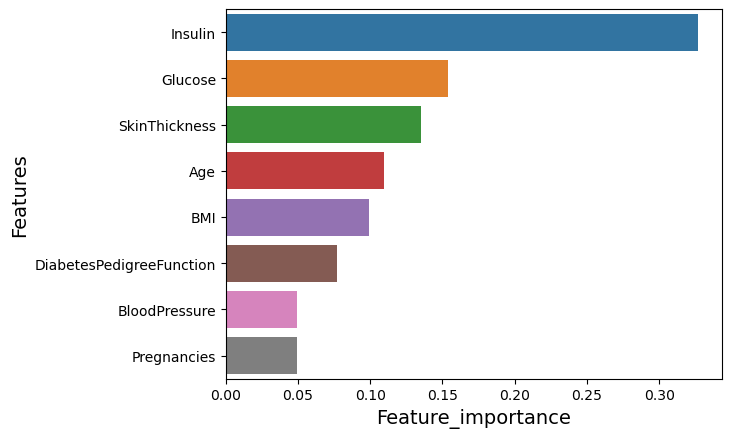

,Feature importance (in %)
Insulin,32.69
Glucose,15.37
SkinThickness,13.50
Age,10.96
BMI,9.90
DiabetesPedigreeFunction,7.72
BloodPressure,4.93
Pregnancies,4.93


In [42]:
#feature importances
feature_imp=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 

sns.barplot(x=feature_imp,y=feature_imp.index)

plt.xlabel("Feature_importance",fontsize=14)
plt.ylabel("Features",fontsize=14)
plt.show()

pd.DataFrame(feature_imp*100 , columns=["Feature importance (in %)"]).round(2)

Final Report

In [43]:
#Appending all different machine learning models in a single list.
models = []
models.append(('LR', LogisticRegression(random_state=10)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',random_state=10)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski')))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(kernel="linear", probability=True, random_state=10)))

#ensemble_learning_techniques
models.append(('RF', RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10)))
models.append(('GB', GradientBoostingClassifier(random_state=10)))

In [44]:


#Define a function to bulid  and evaluate the model
#Empty dataframe
METRICS=pd.DataFrame(index=[],columns=[])
def ML1(name,model):
    #Hold_out method:
    #print(name)
    model=model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    #print(confusion_matrix(y_test,prediction)) 
    TN,FP,FN,TP=confusion_matrix(y_test,prediction).ravel()
    #for final comparison
    METRICS.loc[name,'training_acc']=accuracy_score(y_train.ravel(),model.predict(X_train))
    METRICS.loc[name,'testing_acc']=accuracy_score(y_test.ravel(),prediction)
    METRICS.loc[name,'precision']=precision_score(y_test.ravel(),prediction)
    METRICS.loc[name,'recall']=recall_score(y_test.ravel(),prediction)
    METRICS.loc[name,"f1_score"]=f1_score(y_test.ravel(),prediction)
    METRICS.loc[name,'Sensitivity']=TP/(TP+FN)
    METRICS.loc[name,'Specificity']=TN/(TN+FP)
    METRICS.loc[name,'roc_auc_score']=roc_auc_score(y_test,prediction)

In [45]:
for (name,model) in models:
    ML1(name,model) 
dframe1=100*METRICS
dframe1.round(2)

,training_acc,testing_acc,precision,recall,f1_score,Sensitivity,Specificity,roc_auc_score
LR,77.67,77.92,67.65,79.31,73.02,79.31,77.08,78.20
DT,100.00,83.12,79.27,74.71,76.92,74.71,88.19,81.45
KNN,83.85,80.52,70.59,82.76,76.19,82.76,79.17,80.96
GNB,73.03,75.32,66.67,68.97,67.80,68.97,79.17,74.07
SVC,82.87,81.39,71.15,85.06,77.49,85.06,79.17,82.11
RF,100.00,86.58,82.56,81.61,82.08,81.61,89.58,85.60
GB,99.02,86.58,81.11,83.91,82.49,83.91,88.19,86.05


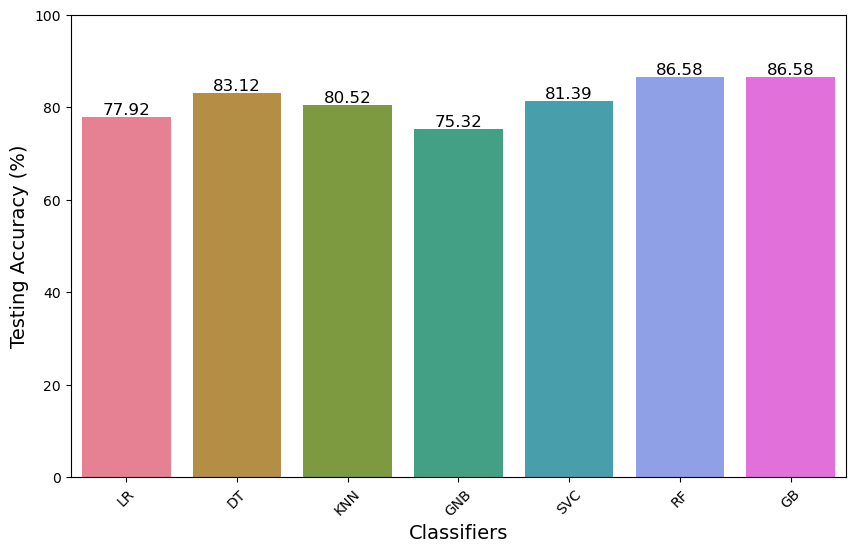

In [46]:


# Extracting the testing accuracy scores from the METRICS DataFrame
testing_acc_scores = dframe1['testing_acc']

# Creating the plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(testing_acc_scores))  # Generate a unique color for each bar
sns.barplot(x=testing_acc_scores.index, y=testing_acc_scores, palette=colors)

# Adding the accuracy score on top of each bar
for i in range(len(testing_acc_scores)):
    plt.text(i, testing_acc_scores[i] + 0.5, f'{testing_acc_scores[i]:.2f}', ha='center', fontsize=12)

# Setting the plot labels and title

plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Testing Accuracy (%)', fontsize=14)
plt.ylim(0, 100)  # Set y-axis from 0 to 100%
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


Now we'll check for ROC curve as it provides a visual way to evaluate and compare the performance of different models in terms of their ability to discriminate between the classes.

In [47]:
#ROC

def plot_roc_curve(name,model):  
    model=model
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    roc_auc=roc_auc_score(y_test,prediction)
    fpr,tpr,thresholds= roc_curve(y_test,model.predict_proba(X_test)[:,1])
    
    plt.plot(fpr,tpr,label='%s ROC(area= %0.4f)' %(name,100*roc_auc))
    plt.plot([0,1],[0,1],'r--')
   
    plt.xlim=([0,1])
    plt.ylim=([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

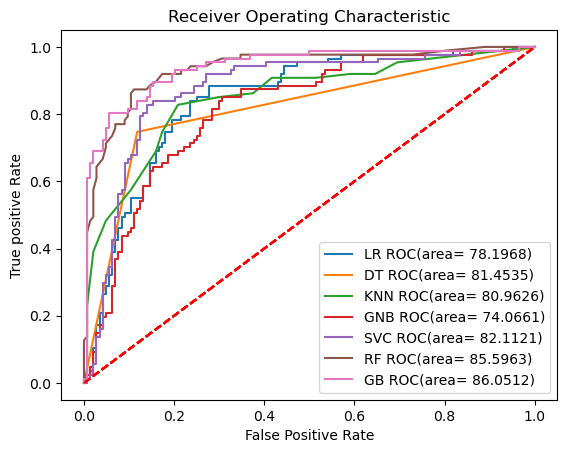

In [48]:
for (name,model) in models:
    plot_roc_curve(name,model)

#### Now we will apply K-Fold Cross Validation

* why?

 because it ensure that our model is robust and generalizes well to unseen data. K-Fold Cross Validation divides the dataset into K subsets (or "folds"), trains the model on K-1 of those folds, and tests it on the remaining fold. This process is repeated K times, with each fold being used exactly once as the test set. The final performance metric is averaged over all K runs, providing a more reliable estimate of the model's performance.

In [49]:
#For Evaluation using KFold
kf=KFold(n_splits=10)

In [50]:
#KFold accuracy scores for each model
df=pd.DataFrame()
for (name,model) in models:    
    kfold=KFold(n_splits=10,shuffle=True, random_state=10)
    scores = cross_val_score(model, X, y.ravel(), cv=kfold, scoring='accuracy')
    df[name]=scores
df=df*100
df.round(4)

,LR,DT,KNN,GNB,SVC,RF,GB
0,79.2208,92.2078,75.3247,77.9221,76.6234,84.4156,87.0130
1,74.0260,84.4156,83.1169,77.9221,75.3247,88.3117,88.3117
2,74.0260,81.8182,81.8182,72.7273,72.7273,83.1169,85.7143
3,83.1169,79.2208,85.7143,80.5195,83.1169,87.0130,83.1169
4,84.4156,87.0130,83.1169,80.5195,84.4156,92.2078,90.9091
5,77.9221,87.0130,84.4156,77.9221,76.6234,89.6104,92.2078
6,70.1299,83.1169,77.9221,70.1299,71.4286,89.6104,88.3117
7,85.7143,84.4156,93.5065,85.7143,84.4156,90.9091,92.2078
8,72.3684,89.4737,76.3158,71.0526,71.0526,88.1579,88.1579
9,73.6842,75.0000,76.3158,71.0526,75.0000,82.8947,82.8947


* GB and RF, show consistent performance across different folds. GB has scores consistently in the 85-92% range, which indicates that these models are stable and not highly sensitive to the specific data used in each fold.
* GB has the highest scores across the folds, with some of the highest individual fold scores reaching up to around 92%. 
* LR and KNN, show more variability. (LR has scores ranging from about 70% to 85%) (KNN has scores ranging from 75% to 95%)
* DT also performs well with several folds showing accuracy above 90%, though it is less consistent than GB.
* GNB shows lower accuracy compared to the other models, often staying around 75-78%, indicating it might be less effective for this dataset.
* KNN and SVC show more fluctuation in performance across different folds.



 ### This suggests that GB might be the best-performing model overall in terms of accuracy.

In [51]:
# Now K-Fold Cross Validation

names = []
scores = []

kfold=KFold(n_splits=10,shuffle=True,random_state=10)
for name, model in models:
    score = cross_val_score(model, X, y.ravel(), cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(100*score)  #----------score which is to be append in a list is multiplied by 100 to convert score in % 
df2 = pd.DataFrame({'Classifier': names, 'Kfold_avg_acc': scores})
df2.round(4)

,Classifier,Kfold_avg_acc
0,LR,77.4624
1,DT,84.3694
2,KNN,81.7567
3,GNB,76.5482
4,SVC,77.0728
5,RF,87.6247
6,GB,87.8845


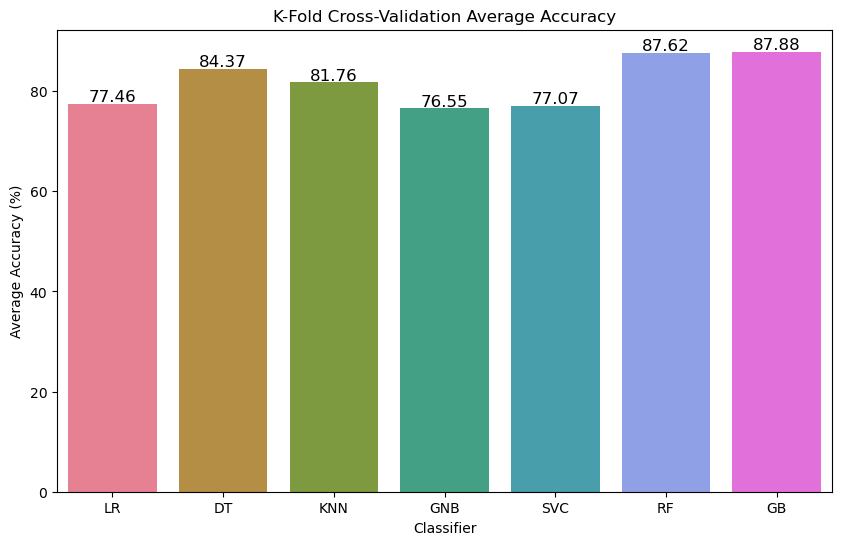

In [52]:
plt.figure(figsize=(10, 6))

# Use a color palette with as many colors as there are classifiers
colors = sns.color_palette('husl', len(df2))
sns.barplot(x='Classifier', y='Kfold_avg_acc', data=df2, palette=colors)

# Adding the accuracy score on top of each bar
for index, value in enumerate(df2['Kfold_avg_acc']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)
plt.title('K-Fold Cross-Validation Average Accuracy')
plt.ylabel('Average Accuracy (%)')
plt.xlabel('Classifier')

plt.show()

* From the above barplot we can easily see that RF and GB performs well with accuracy scores 87.62% & 87.88% respectively.
* DT has 84.37% accuracy score .
* LR,KNN,GNB, and SVC has less accuracy scores.



### Filtering top 4 models 


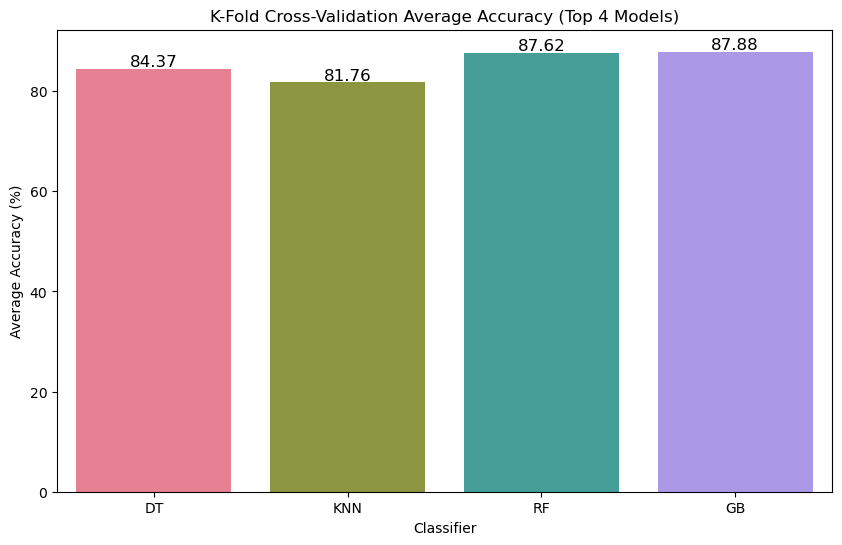

In [53]:
# Filter the DataFrame to include only the best 4 models
best_models = ['RF', 'GB', 'KNN', 'DT']
df_best = df2[df2['Classifier'].isin(best_models)]

plt.figure(figsize=(10, 6))

# Use a color palette with as many colors as there are classifiers
colors = sns.color_palette('husl', len(df_best))
sns.barplot(x='Classifier', y='Kfold_avg_acc', data=df_best, palette=colors)

# Adding the accuracy score on top of each bar
for index, value in enumerate(df_best['Kfold_avg_acc']):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)
plt.title('K-Fold Cross-Validation Average Accuracy (Top 4 Models)')
plt.ylabel('Average Accuracy (%)')
plt.xlabel('Classifier')

plt.show()

Again checking the area under curve 

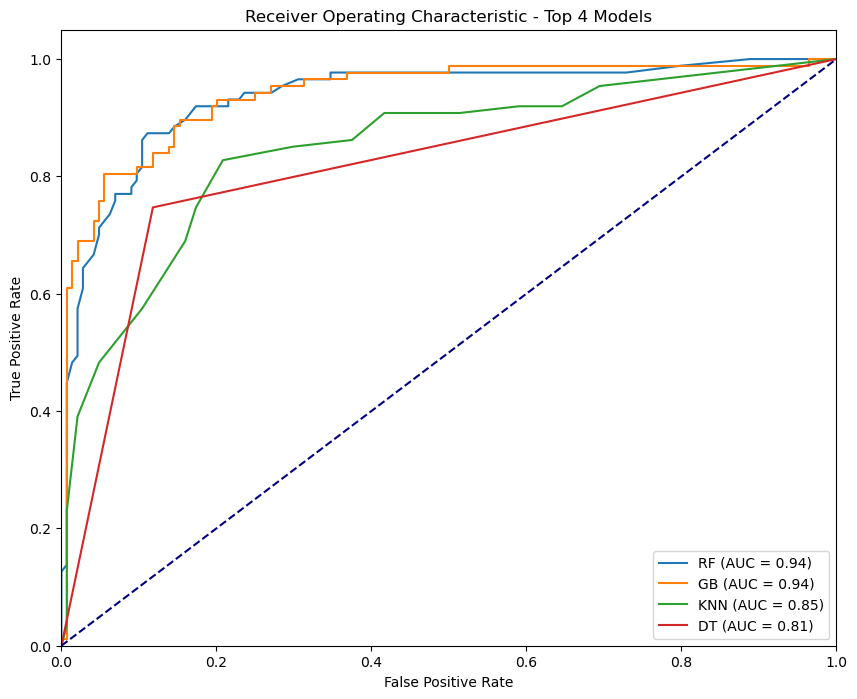

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# List of the best models
best_models = {
    'RF': RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=10),
    'GB': GradientBoostingClassifier(random_state=10),
    'KNN': KNeighborsClassifier(n_neighbors=15, p=2, metric='minkowski'),
    'DT': DecisionTreeClassifier(criterion='entropy', random_state=10)
}

# Plotting ROC curves for the best models
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.gca().set_xlim([0.0, 1.0])  # Set x-axis limits using gca()
plt.gca().set_ylim([0.0, 1.05])  # Set y-axis limits using gca()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Top 4 Models')
plt.legend(loc='lower right')
plt.show()


In [55]:

# Create the dataframe from our previous metrics
top4_models = {
    'Model': ['RF', 'GB', 'KNN', 'DT'],
    'training_acc': [100.00, 99.02, 83.85, 100.00],
    'testing_acc': [86.58, 86.58, 80.52, 83.12],
    'precision': [82.56, 81.11, 70.59, 79.27],
    'recall': [81.61, 83.91, 82.76, 74.71],
    'f1_score': [82.08, 82.49, 76.19, 76.92],
    'Sensitivity': [81.61, 83.91, 82.76, 74.71],
    'Specificity': [89.58, 88.19, 79.17, 88.19],
    'roc_auc_score': [94, 94, 85, 81]
}

# Create DataFrame
df_top4 = pd.DataFrame(top4_models)

# Convert the values to be in percentages (optional)
df_top4[['training_acc', 'testing_acc', 'precision', 'recall', 'f1_score', 'Sensitivity', 'Specificity', 'roc_auc_score']] = df_top4[
    ['training_acc', 'testing_acc', 'precision', 'recall', 'f1_score', 'Sensitivity', 'Specificity', 'roc_auc_score']].round(2)

print(df_top4)


  Model  training_acc  testing_acc  precision  recall  f1_score  Sensitivity  \
0    RF        100.00        86.58      82.56   81.61     82.08        81.61   
1    GB         99.02        86.58      81.11   83.91     82.49        83.91   
2   KNN         83.85        80.52      70.59   82.76     76.19        82.76   
3    DT        100.00        83.12      79.27   74.71     76.92        74.71   

   Specificity  roc_auc_score  
0        89.58             94  
1        88.19             94  
2        79.17             85  
3        88.19             81  


### From this we conclude Gradient Boosting as the best fitted classifier for prediction of diabetes.